# Assignment4. SNA

Big data의 등장으로 많은 데이터들을 효율적이고 정확하게 다루는 것이 큰 이슈가 되고, 다양한 분야에서 중요한 판단의 원천이 되고 있다. 수업에서 배운 machine learning과 social network 분야 또한 방대한 양의 데이터가 유입되고 이를 통해 원하는 결론을 도출하기 위하여 분석이 필요하다. Machine learning의 경우, 관심있는 분야이기에 다양한 algorithm 및 목적에 따른 model 생성 후, classification하는 것에 대하여 다루어 보았다. 하지만, social network의 경우에는 개념이 모호했다. Social network analysis란 사용자 간의 자유로운 의사 소통과 정보 공유, 그리고 사회적 관계를 생성하고 강화시켜주기 위한 것이다. 쉽게, SNS에서 제공되는 '알수도 있는 사람' 추천이 social network analysis의 한 예가 될 수 있다. 이번 과제는 이러한 social network의 다양한 graph와 그에 대한 특성 분석, 그리고 twitter에 대한 분석을 수행하였다.

In [26]:
import networkx as nx
import networkx.algorithms as algo
import matplotlib.pyplot as plt
%matplotlib inline

##1. Graph Generators를 사용한 그래프 특성 분석
###1) Classic 5개

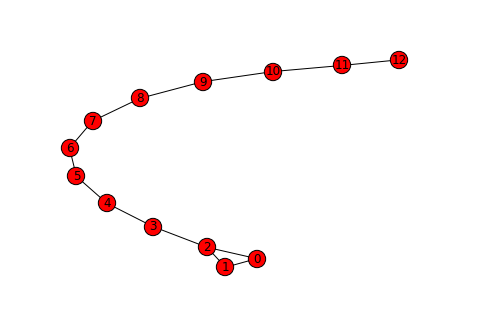

In [27]:
lollipop = nx.lollipop_graph(3,10)
nx.draw(lollipop, node_size=300, with_labels=True, font_size=12)

- lollipop_graph(m, n, create_suing=None)
- return the Lollipop Graph 
- m: 동그란 부분의 개수
- n: 막대 부분의 개수

In [34]:
print "radius(lollipop):", algo.radius(lollipop)
print "diameter(lollipop):", algo.diameter(lollipop)
print "center(lollipop):", algo.center(lollipop)
print "periphery(lollipop):", algo.periphery(lollipop)
print "Average clustering coefficient:", algo.average_clustering(lollipop)
nx.clustering(lollipop)

radius(lollipop): 6
diameter(lollipop): 11
center(lollipop): [6, 7]
periphery(lollipop): [0, 1, 12]
Average clustering coefficient: 0.179487179487


{0: 1.0,
 1: 1.0,
 2: 0.3333333333333333,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0}

- radius: eccentricity가 가장 작은 값으로 6, 7에서 6으로 가장 작은 값, 즉 radius = 6
- diameter: eccentricity가 가장 큰 값으로 0, 1, 12에서 11로 가장 geodesic distance가 크다.
- center는 radius 값을 갖는 노드로 6,7이다.
- periphery: eccentricity가 diameter과 동일한 값을 갖는 노드로 0, 1, 12가 된다.
- cluster coefficient는 이웃 노드들 간의 관계를 나타내며 0, 1, 2 노드에서만 이웃 노드 간의 관계가 존재한다. 0과 1 노드는 이웃간에 모두 edge가 있으므로 값이 1이고, 2번 노드의 경우, 세 개의 이웃간의 노드가 하나밖에 없기 때문에 0.33이 된다.

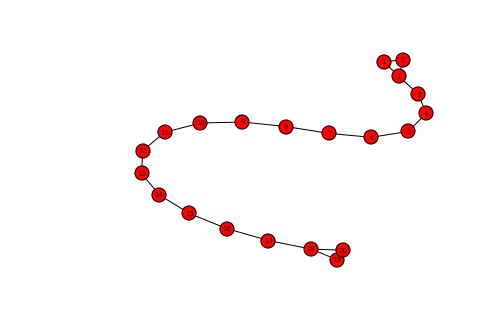

In [29]:
barbell = nx.barbell_graph(3, 15)
nx.draw(barbell, node_size=200, with_labels=True, font_size = 7)

- barbell_graph(m1, m2[, create_using])
- return the barbell graph
- m1: 양 끝의 동그란 부분의 개수 (동일)
- m2: 양 끝을 연결하는 부분의 node 수

In [35]:
print "radius(barbell):", algo.radius(barbell)
print "diameter(barbell):", algo.diameter(barbell)
print "center(barbell):", algo.center(barbell)
print "periphery(barbell):", algo.periphery(barbell)
print "Average clustering coefficient:", algo.average_clustering(barbell)
nx.clustering(barbell)

radius(barbell): 9
diameter(barbell): 18
center(barbell): [10]
periphery(barbell): [0, 1, 19, 20]
Average clustering coefficient: 0.222222222222


{0: 1.0,
 1: 1.0,
 2: 0.3333333333333333,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.3333333333333333,
 19: 1.0,
 20: 1.0}

- radius 값과 그 값을 갖는 노드인 center는 그래프의 중앙 부근에 있는 노드가 될 것이라 예상된다. 바벨의 모양이 양방향으로 동일하기 때문에 중앙에 위치한 10번 노드가 center가 되고 최소의 eccentricity 값, 즉 radius 값으로 9이다.
- diameter는 eccentricity가 최대인 것으로 양방향의 가장 끝에 있는 노드로 이동할 때의 geodesic distance가 된다. 그러므로 periphery는 양 끝 노드인 0, 1, 19, 20번 노드이고 diameter는 18이다.
- clustering coefficient는 이웃간의 edge가 존재하는 양 끝의 barbell부분에서만 값이 존재한다. 0, 1, 19, 20 번 노드의 경우 이웃간의 edge가 모두 존재하기 때문에 1이고, 2번과 18번의 경우는 한쪽 이웃 노드와의 edge가 존재하지 않기 때문에 0.33이 된다.

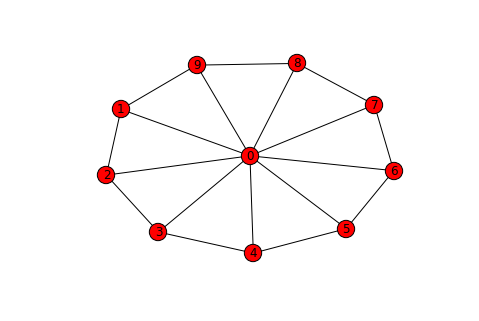

In [36]:
wheel = nx.wheel_graph(10)
nx.draw(wheel, node_size=300, with_labels=True, font_size=12)

- return the wheel graph: single hub node 
- 각각의 (n-1)node와 연결된 cycle graph

In [37]:
print "radius(wheel):", algo.radius(wheel)
print "diameter(wheel):", algo.diameter(wheel)
print "center(wheel):", algo.center(wheel)
print "periphery(wheel):", algo.periphery(wheel)
print "Average clustering coefficient:", algo.average_clustering(wheel)
nx.clustering(wheel)

radius(wheel): 1
diameter(wheel): 2
center(wheel): [0]
periphery(wheel): [1, 2, 3, 4, 5, 6, 7, 8, 9]
Average clustering coefficient: 0.625


{0: 0.25,
 1: 0.6666666666666666,
 2: 0.6666666666666666,
 3: 0.6666666666666666,
 4: 0.6666666666666666,
 5: 0.6666666666666666,
 6: 0.6666666666666666,
 7: 0.6666666666666666,
 8: 0.6666666666666666,
 9: 0.6666666666666666}

- wheel 모양은 중앙의 하나의 노드 (single hub node)로 연결된 형태로 cycle graph이다.
- radius는 hub node에서 다른 모드로 가는 eccentricity, 즉 1이 되고, center는 모든 노드가 연결된 single hub인 0번 node가 된다.
- diameter는 single hub node를 제외한 나머지 노드 간의 거리로, geodesic distance이므로 hub node를 지나는 가장 최소 거리인 2가 된다. Periphery는 역시 hub node를 제외한 모든 노드가 된다.
- Cluster coefficient는 hub node를 제외하고 동일한 값을 가지며, 0에서는 다른 노드에 비해 적은 이웃 노드간의 edge가 존재하므로 값이 작게 나온다.

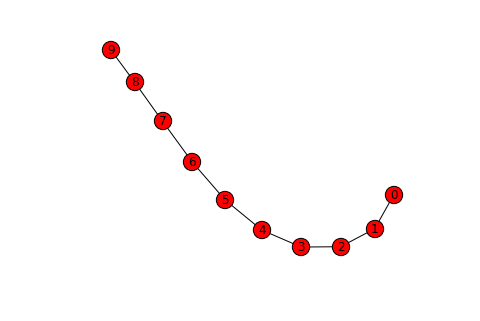

In [38]:
path = nx.path_graph(10)
nx.draw(path, node_size=300, with_labels=True, font_size=12)

- Return the path graph P_n of n nodes linealy connected by n-1 edges.

In [39]:
print "radius(path):", algo.radius(path)
print "diameter(path):", algo.diameter(path)
print "center(path):", algo.center(path)
print "periphery(path):", algo.periphery(path)
print "Average clustering coefficient:", algo.average_clustering(path)
nx.clustering(path)

radius(path): 5
diameter(path): 9
center(path): [4, 5]
periphery(path): [0, 9]
Average clustering coefficient: 0.0


{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0}

- Radius는 중앙에 위치한 node부터의 거리가 되므로 5가 되며, center는 4,5가 된다.
- Diameter는 양 끝 점 사이의 geodesic distance가 되며 9가 되고, periphery는 양 끝 노드인 0과 9가 된다.
- Clustering coefficient는 각 노드마다 neighbor 간의 edge가 존재하지 않기 때문에 모두 0이 된다.

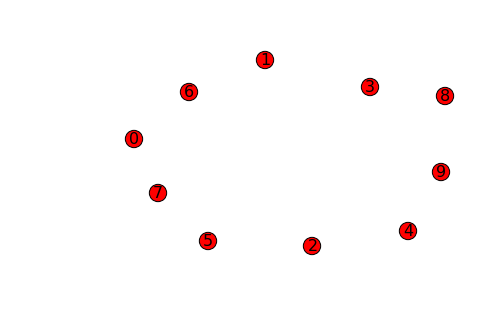

In [40]:
empty = nx.empty_graph(10)
nx.draw(empty, node_size=300, with_labels=True, font_size=16)

- Return the empty graph with n nodes and zero deges.

In [41]:
print "radius(empty):", algo.radius(empty)
print "diameter(empty):", algo.diameter(empty)
print "center(empty):", algo.center(empty)
print "periphery(empty):", algo.periphery(empty)
print "Average clustering coefficient:", algo.average_clustering(empty)
nx.clustering(empty)

radius(empty):

NetworkXError: Graph not connected: infinite path length

- Empty graph의 형태가 궁금하여 선택하였는데, 이는 edge과 degree가 없는 n개의 node를 출력한다. 그러므로 위의 값들이 존재하지 않아 error가 발생한다.

###2. Random graphs

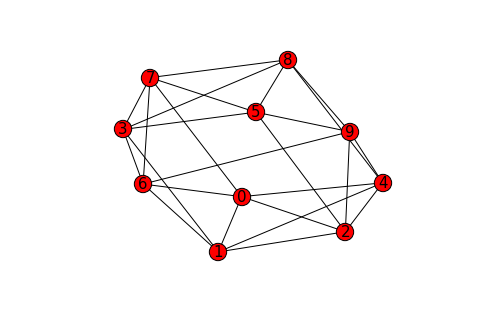

In [42]:
regular = nx.random_regular_graph(5, 10)
nx.draw(regular, node_size=300, with_labels=True, font_size=15)

- Random regular graph 반환
- 각각 degree d를 갖는 n개의 node graph 형태 -> 5개의 degree를 갖는 10개의 node
- n: degree
- n: number of nodes

In [43]:
print "radius(regular):", algo.radius(regular)
print "diameter(regular):", algo.diameter(regular)
print "center(regular):", algo.center(regular)
print "periphery(regular):", algo.periphery(regular)
print "Average clustering coefficient:", algo.average_clustering(regular)
nx.clustering(regular)

radius(regular): 2
diameter(regular): 2
center(regular): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
periphery(regular): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Average clustering coefficient: 0.48


{0: 0.5,
 1: 0.5,
 2: 0.5,
 3: 0.5,
 4: 0.5,
 5: 0.5,
 6: 0.4,
 7: 0.5,
 8: 0.5,
 9: 0.4}

- regular graph의 경우, 모든 노드가 random하게 5개씩의 노드와 연결되어 있기 때문에, radius와 diameter가 동일하게 2가 된다. 어떤 노드로 가던 geodesic distance는 2가 되기 때문이다.
- Radius와 diameter가 모든 노드에서 동일하기 때문에 center와 periphery도 전체 노드가 속한다.
- clustering coefficient는 random하게 연결되어있기 때문에 각각의 이웃 노드들 간의 연결 관계에 차이가 있기 때문에 모든 노드의 값이 동일하지 않다.

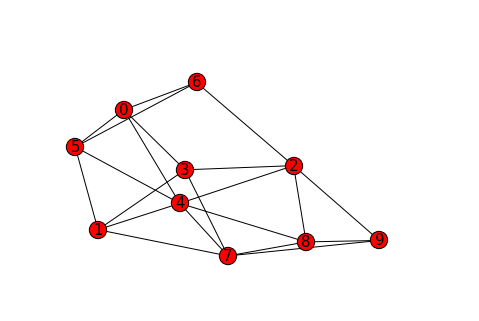

In [44]:
barabasi = nx.barabasi_albert_graph(10, 3)
nx.draw(barabasi, node_size=300, with_labels=True, font_size=15)

- Barabasi-Albert preferential attachment model
- m: node의 수
- m: 새로운 노드에서 존재하는 노드로 attach되는 edge의 수
- 새로운 노드가 기존 노드에 3개의 edge로 붙으며 생성되는 그래프 형태

In [45]:
print "radius(barabasi):", algo.radius(barabasi)
print "diameter(barabasi):", algo.diameter(barabasi)
print "center(barabasi):", algo.center(barabasi)
print "periphery(barabasi):", algo.periphery(barabasi)
print "Average clustering coefficient:", algo.average_clustering(barabasi)
nx.clustering(barabasi)

radius(barabasi): 2
diameter(barabasi): 3
center(barabasi): [1, 2, 3, 4, 8]
periphery(barabasi): [0, 5, 6, 7, 9]
Average clustering coefficient: 0.41


{0: 0.3333333333333333,
 1: 0.5,
 2: 0.2,
 3: 0.16666666666666666,
 4: 0.3333333333333333,
 5: 0.5,
 6: 0.3333333333333333,
 7: 0.4,
 8: 0.6666666666666666,
 9: 0.6666666666666666}

- Minimum essentricity는 2로, 노드 1, 2, 3, 4, 8에서 동일하다.
- 다른 노드 간의 geodesic distance는 모두 3이므로 diameter는 3이고 periphery는 center인 5개의 노드를 제외한 모든 노드이다.
- clustering coefficient는 모두 3개의 edge를 갖기 때문에 전체적으로 값을 갖는다. 하지만 전반적으로 clustering coefficient가 매우 높지 않고, 특히 3번 노드의 경우 매우 작다.왜냐하면 3번 노드의 이웃 노드 간의 연결 관계가 1번과 7번 사이의 edge 하나만 존재하기 때문이다.

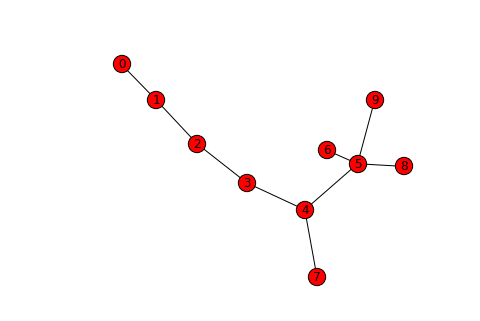

In [46]:
powerlaw = nx.random_powerlaw_tree(10, gamma=3, seed=None, tries=100)
nx.draw(powerlaw, node_size=300, with_labels=True, font_size=12)

- Powerlaw degree distribution을 갖는 graph 출력
- n: node의 수
- gamma: floatting. power-law의 exponent
- seed: random number generator (default = None)
- tries: tree의 sequence를 조정하기 위한 attempts의 수

In [47]:
print "radius(powerlaw):", algo.radius(powerlaw)
print "diameter(powerlaw):", algo.diameter(powerlaw)
print "center(powerlaw):", algo.center(powerlaw)
print "periphery(powerlaw):", algo.periphery(powerlaw)
print "Average clustering coefficient:", algo.average_clustering(powerlaw)
nx.clustering(powerlaw)

radius(powerlaw): 3
diameter(powerlaw): 6
center(powerlaw): [3]
periphery(powerlaw): [0, 6, 8, 9]
Average clustering coefficient: 0.0


{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0}

- radius와 center는 그래프의 중앙에 위치한 노드에서의 거리가 된다. 양 방향의 중심에 위치한 노드에서 양 끝으로 가는 거리가 최소 eccentricity가 되기 때문에 radius는 3, center는 3번 노드가 된다.
- diameter는 양 끝 노드 간의 거리로, 6이며 0과 6, 8, 9번 노드가 periphery가 된다.
- cluster coefficient는 모두 이웃 노드들 간의 edge가 없기 때문에 0이다.

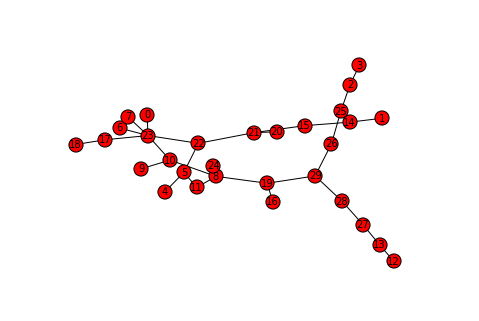

In [48]:
watts=nx.watts_strogatz_graph(30,3,0.6)
nx.draw(watts, node_size=200, with_labels=True, font_size=10)

- Watts-Strogatz small-world graph 출력
- n: node의 수
- k: ring topology에서 k개의 가까운 neighbor과 연결된 각 노드의 수
- p: 각 edge의 연결 확률

In [49]:
print "radius(watts):", algo.radius(watts)
print "diameter(watts):", algo.diameter(watts)
print "center(watts):", algo.center(watts)
print "periphery(watts):", algo.periphery(watts)
print "Average clustering coefficient:", algo.average_clustering(watts)
nx.clustering(watts)

radius(watts): 7
diameter(watts): 13
center(watts): [8, 10, 11]
periphery(watts): [1, 3, 12]
Average clustering coefficient: 0.0


{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0,
 11: 0.0,
 12: 0.0,
 13: 0.0,
 14: 0.0,
 15: 0.0,
 16: 0.0,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 0.0,
 29: 0.0}

- 가장 작은 eccentricity는 7이고, 중앙에 위치한 8, 10, 11번 노드가 center가 된다.
- diameter는 양 끝의 eccentricity로 13이며, 양 끝 노드인 1, 3, 12번 노드가 periphery에 해당한다.
- 노드의 이웃들 간의 연결관계가 없기 때문에 clustering coefficient는 모두 0이 된다.

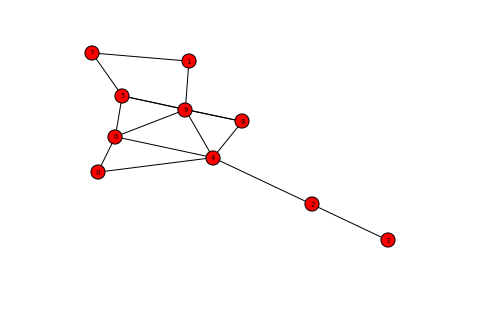

In [52]:
gnm= nx.gnm_random_graph(10, 15)
nx.draw(gnm, node_size=200, with_labels=True, font_size=7)

- n개의 node와 m개의 edge를 random하게 추출한 graph
- n: node의 수
- m: edge의 수

In [53]:
print "radius(gnm):", algo.radius(gnm)
print "diameter(gnm):", algo.diameter(gnm)
print "center(gnm):", algo.center(gnm)
print "periphery(gnm):", algo.periphery(gnm)
print "Average clustering coefficient:", algo.average_clustering(barbell)
nx.clustering(gnm)

radius(gnm): 3
diameter(gnm): 5
center(gnm): [0, 4, 6, 8, 9]
periphery(gnm): [3, 7]
Average clustering coefficient: 0.222222222222


{0: 1.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.3,
 5: 0.3333333333333333,
 6: 0.5,
 7: 0.0,
 8: 0.6666666666666666,
 9: 0.4}

- 최소 eccentricity는 3으로, center는 0, 4, 6, 8, 9번 노드이다.
- 최대 eccentricity는 5로, periphery는 양 끝에 존재하는 3, 7번 노드이다.
- 1, 2, 3, 7번 노드에는 이웃 간의 edge가 존재하지 않으며, 0번 노드의 경우 모든 이웃 노드 간의 연결이 있기 때문에 1이 된다.

## 2. Twitter social graph analysis

In [54]:
from networkx import nx
import os
import numpy as np

mainpath = os.path.dirname(os.path.realpath('__file__'))

In [55]:
network = nx.DiGraph()
    # Directed graph 생성 -> twitter가 방향성이 존재하기 때문 (follower, following)

def load_edges():
    edge_file = open("%s/twitter_combined.txt" % (mainpath),"r")
        # twitter_combined.txt의 edge 읽기
        
    for line in edge_file:
        # node from node to
        split = [int(x) for x in line.split(" ")]
        node_from = split[0]
        node_to = split[1]
        network.add_edge(node_from, node_to)
        
load_edges()

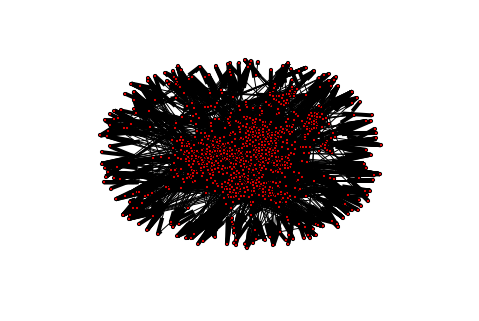

In [56]:
nx.draw(network, node_size=10, with_labels=False, font_size=16)

- 노트북의 사양으로 인하여 전체에 대한 그래프를 읽어들이는데 너무 오랜 시간이 소요되되어 'twitter_combined.txt'의 edge data의 사이즈를 줄여 출력하였습니다. 

In [57]:
unfinetwork = network.to_undirected()
print "number of nodes:", network.number_of_nodes()
print "number of edges:", network.number_of_edges()
print "average clustering coefficient:", nx.average_clustering(unfinetwork)

number of nodes: 1831
number of edges: 32107
average clustering coefficient: 0.503923543895


In [58]:
print "radius:", algo.radius(network)
print "diameter:", algo.diameter(network)

radius:

NetworkXError: Graph not connected: infinite path length

- Edge 데이터를 줄여서 가져오면서 node 간에 연결되지 않은 부분이 생성되어 eccentricity를 구할 수 없어서 발생한 문제로 생각됩니다. Minimum eccentricity와 maximum eccentricity 모두 infinite로 출력되며, 노드 간의 연결이 끊어져있기 때문에 거리를 계산할 수 없다 판단하였습니다.

In [64]:
# SCC
largest_scc = max(nx.strongly_connected_component_subgraphs(network), key=len)
print "number of SCC node:", len(largest_scc.nodes())
print "number of SCC edge:", len(largest_scc.edges())

number of SCC node: 982
number of SCC edge: 18069


In [62]:
# WCC
largest_wcc = max(nx.weakly_connected_component_subgraphs(network), key=len)
print "number of WCC node:", len(largest_wcc.nodes())
print "number of WCC edge:", len(largest_wcc.edges())

number of WCC node: 1357
number of WCC edge: 21045


In [69]:
# Degree centrality
degree_centrality = nx.degree_centrality(network)

import pandas as pd
degree = pd.DataFrame(degree_centrality.values(), index=degree_centrality.keys(), columns=['centrality'])
degree_top10 = degree.sort('centrality', ascending=False)
degree_top10.head(10)

,centrality
16038438,0.134973
3359851,0.130601
40981798,0.120219
43003845,0.118579
153226312,0.108197
270449528,0.099454
83943787,0.097268
259842341,0.096721
151338729,0.095628
274153775,0.095082


In [70]:
# Closeness_centrality
closeness_centrality = nx.closeness_centrality(network)

import pandas as pd
closeness = pd.DataFrame(closeness_centrality.values(), index=closeness_centrality.keys(), columns=['centrality'])
closeness_top10 = closeness.sort('centrality', ascending=False)
closeness_top10.head(10)

,centrality
3359851,0.188505
20273398,0.186995
115395977,0.171764
59454817,0.170983
465838507,0.168557
127569781,0.167680
63485337,0.166935
20661527,0.166443
16038438,0.166279
24585498,0.166116


In [71]:
# Betweenness_centrality
betweenness_centrality = nx.betweenness_centrality(network)

import pandas as pd
betweenness = pd.DataFrame(betweenness_centrality.values(), index=betweenness_centrality.keys(), columns=['centrality'])
betweenness_top10 = betweenness.sort('centrality', ascending=False)
betweenness_top10.head(10)

,centrality
3359851,0.167797
15666380,0.131412
20273398,0.080371
4620451,0.073102
15439395,0.064665
16038438,0.051454
11348282,0.045511
15234407,0.037672
8295072,0.035582
63485337,0.030047


In [72]:
# Eigenvector_centrality
eigenvector_centrality = nx.eigenvector_centrality(network)

import pandas as pd
eigenvector = pd.DataFrame(eigenvector_centrality.values(), index=eigenvector_centrality.keys(), columns=['centrality'])
eigenvector_top10 = eigenvector.sort('centrality', ascending=False)
eigenvector_top10.head(10)

,centrality
40981798,0.190129
22462180,0.185740
34428380,0.184350
43003845,0.183178
17868918,0.157820
31331740,0.144108
18996905,0.143480
27633075,0.142211
8088112,0.140476
151338729,0.135695


이번 과제는 총 두 문제로 social network graph 10개 분석과 twitter social graph 분석에 대한 것이었다. Social network graph의 경우, 수업 시간에 잠깐 보았을 때는 흥미를 느끼지 못하였는데, 노드의 개수, edge의 개수 등을 변경하며 graph의 형태를 관찰하였고, 각각의 radius, diameter 등 특징을 계산하고 분석하였다. 다양한 그래프들이 있었지만 그 중 empty graph가 가장 기억에 남는다. Edge와 degree가 없는 n개의 node를 출력하는 그래프인데, 무엇을 위해 사용하도록 만들어진 것인지에 대한 의문이 들었다. 원하는 edge 정보를 입력하기 전에 초기화를 목적으로 사용하는 것이 아닐까 싶다. 두번째, twitter social graph 분석은 기본 python에 대한 기초와 data를 읽어오는 것에 대해 미숙해서 많이 어려웠다. 또한 노트북의 사양으로 인하여 전체 데이터를 분석하지 못한 점이 매우 아쉽다. 하지만, 그래프를 출력하고 특성을 출력하면서 이론으로 배웠던 것들에 대하여 더 정확히 알 수 있었다. 특히, edge의 개수를 잘라내었기에 노드가 완전히 연결되지 않았을 수도 있어서 radius와 diameter가 출력되지 않을 수 있다는 점이었다. 처음에는 값이 출력되지 않아서 당황하였는데, 노드가 끊어졌다고 보면 최소 거리가 존재하지 않고 infinite로 출력이 될 것이다. 또한 전체 노드의 개수와 WCC의 노드 개수에 차이가 있는 것을 보면 모든 노드가 연결되지 않았음을 알 수 있다. 그러므로 radius와 diameter 값에서 오류가 발생하였다고 판단하였다. 또한 directed graph를 출력했을 때 흥미로웠던 점은 중간 노드에 가장 많은 edge가 존재하고 밀집해 있다는 점이었다. 외곽으로 갈수록 edge가 적고 서로 연결된 부분이 거의 없었다. 이런 특성을 확인하는 것이 매우 신기하였다. 전체 데이터에 대해 수행하고 SNAP 사이트의 값과 비교해보지 못한 것이 정말 아쉬운 과제라고 생각한다. 

첫 수업을 들었을 때, 생각했던 수업과는 다른 목적의 과목이어서 당황하였고, 써본적이 없는 Python을 써야한다는 것이 매우 부담되었습니다. 하지만 관심 분야인 machine learning algorithm을 다루었고, 이번 수업이 아니었으면 접해보지 못했을 social network에 대해 간략하게 나마 알게 된 것은 앞으로 다른 연구에서도 큰 도움이 될 것 같습니다. 특히 data를 분석하는 과제를 함으로서 주어진 데이터를 visualization하고 분석하는 것이 이전보다 어렵게 느껴지지 않는 점에서 많은 것을 배웠던 것 같습니다.독후감을 위해 읽었던 '통계학이 최강의 학문이다'를 보면, 빅데이터 분석이 중요해지고 이를 판단하기 위하여 통계학이 매우 중요하다고 하는데, 수업을 통해 이런 거대한 데이터들의 분석의 중요성을 많이 느꼈습니다. Machine learning algorithm에 대해 공부하고 있는데, 많은 data를 효율적으로 관리하고 처리하기 위하여 더 연구해야겠다는 생각이 들었습니다. 한 학기동안 수업 정말 잘 들었습니다. 감사합니다!